In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext

In [2]:
!pip install SPARQL2Spark==0.0.5

In [3]:
from SPARQL2Spark.Wrapper import SPARQL2SparkWrapper

In [4]:
spark = (SparkSession
          .builder
          .appName("interfacing spark sql to hive metastore without configuration file")
          .config("hive.metastore.uris", "thrift://hive-metastore:9083") 
          .enableHiveSupport() 
          .getOrCreate())

In [5]:
sparql_endpoint = "http://jena-fuseki:3030/pizzads"

query = """
    PREFIX : <http://www.co-ode.org/ontologies/pizza/pizza.owl#>

    SELECT (COUNT(?anomalous)/(COUNT(?good)+COUNT(?anomalous)) as ?count) ?restaurant
    WHERE {
      SERVICE <http://ontop:8080/sparql> {
        {?anomalous a :AnomalousPizza; :restaurant ?restaurant.}
        UNION
        {?good a :GoodPizza; :restaurant ?restaurant.}
      }
    }
    GROUP BY ?restaurant
"""

wrapper = SPARQL2SparkWrapper(spark, sparql_endpoint)
result = wrapper.query(query)
resultDF = result.dataFrame

count,restaurant
0.666666666666666666666666,RESTAURANT_1
0.111111111111111111111111,RESTAURANT_2
0.2,RESTAURANT_3



In [6]:
resultDF.show()

+--------------------+------------+
|               count|  restaurant|
+--------------------+------------+
|0.666666666666666...|RESTAURANT_1|
|0.111111111111111...|RESTAURANT_2|
|                 0.2|RESTAURANT_3|
+--------------------+------------+



In [7]:
import pandas as pd

pandasDF = resultDF.toPandas()

(0.0, 1.0)

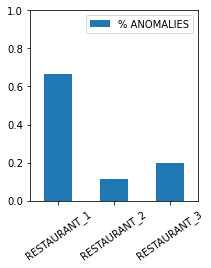

In [8]:
df = pd.DataFrame({'RESTAURANTS':pandasDF["restaurant"], '% ANOMALIES':pandasDF["count"].astype(float)})
ax = df.plot.bar(x='RESTAURANTS', y='% ANOMALIES', rot=35, stacked=False,figsize=(3,3.5))
ax.set_xlabel("")
ax.set_ylim(0,1)